## Jada Macharie
## Assignment 5

In [82]:
import plotly.express as px
import plotly.io as pio
import pandas as pd
import json
import kaleido
import numpy as np
import matplotlib as plot
import os

In [83]:
os.getcwd()
os.chdir('/Users/jadamacharie/Downloads')
os.getcwd()

'/Users/jadamacharie/Downloads'

## Task 1

In [84]:
with open("gz_2010_us_050_00_5m.json",encoding='latin-1') as f:
    UScounties = json.load(f)
    
with open("fipsToState.json", 'r') as f:
  states_data = json.load(f)   

# df_states = pd.read_csv('/Users/jadamacharie/Downloads/statefips.csv')
# df_statesdata = pd.DataFrame(df_states)
# print(df_statesdata)

In [85]:
USAcounties = []
for county in UScounties['features']:{
    USAcounties.append(county['properties'])}
print(len(USAcounties))
# print(USAcounties[0:20]) 

3221


In [86]:
df_Counties=pd.DataFrame(USAcounties)
df_Counties

,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA
0,0500000US02261,02,261,Valdez-Cordova,CA,34239.880
1,0500000US02270,02,270,Wade Hampton,CA,17081.433
2,0500000US02275,02,275,Wrangell,Cty&Bor,2541.483
3,0500000US02290,02,290,Yukon-Koyukuk,CA,145504.789
4,0500000US04003,04,003,Cochise,County,6165.690
...,...,...,...,...,...,...
3216,0500000US50025,50,025,Windham,County,785.305
3217,0500000US50027,50,027,Windsor,County,969.337
3218,0500000US51001,51,001,Accomack,County,449.496
3219,0500000US51005,51,005,Alleghany,County,445.457


In [87]:
countycount = df_Counties.groupby('NAME').size()
print(countycount)

y= df_Counties.groupby('NAME').size()

NAME
Abbeville        1
Acadia           1
Accomack         1
Ada              1
Adair            4
                ..
Yukon-Koyukuk    1
Yuma             2
Zapata           1
Zavala           1
Ziebach          1
Length: 1909, dtype: int64


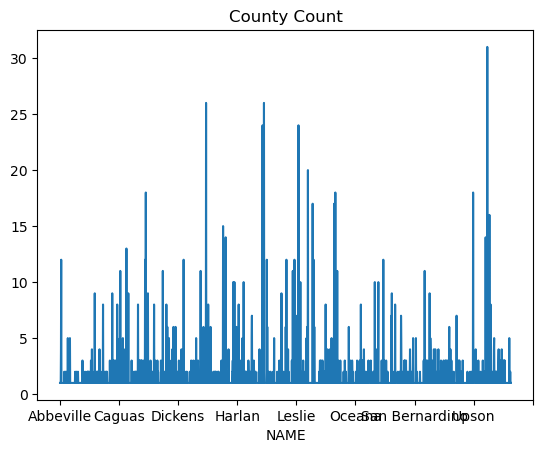

In [88]:
test_fig = countycount.plot.line(x= 'NAME', title = 'County Count')

In [89]:
state_codes_def = """\
01,Alabama
02,Alaska
04,Arizona
05,Arkansas
06,California
08,Colorado
09,Connecticut
10,Delaware
11,District of Columbia
12,Florida
13,Georgia
15,Hawaii
16,Idaho
17,Illinois
18,Indiana
19,Iowa
20,Kansas
21,Kentucky
22,Louisiana
23,Maine
24,Maryland
25,Massachusetts
26,Michigan
27,Minnesota
28,Mississippi
29,Missouri
30,Montana
31,Nebraska
32,Nevada
33,New Hampshire
34,New Jersey
35,New Mexico
36,New York
37,North Carolina
38,North Dakota
39,Ohio
40,Oklahoma
41,Oregon
42,Pennsylvania
44,Rhode Island
45,South Carolina
46,South Dakota
47,Tennessee
48,Texas
49,Utah
50,Vermont
51,Virginia
53,Washington
54,West Virginia
55,Wisconsin
56,Wyoming
72,Puerto Rico"""

state_codes_def = state_codes_def.split('\n')
for i in range(len(state_codes_def)):
    state_codes_def[i] = state_codes_def[i].split(',')

#Create state codes dictionary
state_codes = {}
for pair in state_codes_def:
    state_codes[pair[0]] = pair[1]

print(f"State code '16' corresponds to {state_codes['16']}.")

State code '16' corresponds to Idaho.


In [90]:
def allCounties(USAcounties_list, key_properties):
    county_dict = {}

    unique_county = set([county[key_properties] for county in USAcounties_list])
    
    for unique_county in unique_county:
        county_dict[unique_county] = []

    for county in USAcounties_list:
        county_dict[county[key_properties]].append(county)
        
    return county_dict


In [91]:
def allCommonProperties(county_dict, x):

    if x > len(county_dict):
        x = len(county_dict)

    common_properties = []
    
    for i in range(x):
        common_properties.append([None, 0])

    for key in county_dict:
        total_counties = len(county_dict[key])

        common_properties_total = [common_prop[1] for common_prop in common_properties]

        if total_counties > min(common_properties_total):
            k = common_properties_total.index(min(common_properties_total))
            common_properties[k] = [key, total_counties]

    common_properties = [key[0] for key in sorted(common_properties, key=lambda row : row[1], reverse=True)]
    return common_properties
 

There are 31 Washington Counties.
There are 26 Franklin Counties.
There are 26 Jefferson Counties.


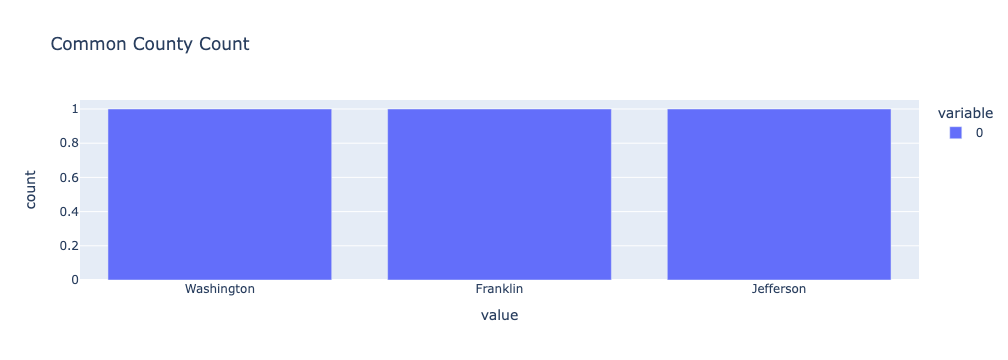

In [92]:
newcounties_dict = allCounties(USAcounties, 'NAME')
list(newcounties_dict)
common_county_names = allCommonProperties(newcounties_dict, 3)

for county_name in common_county_names:
    print(f"There are {len(newcounties_dict[county_name])} {county_name} Counties.")
fig = px.bar(common_county_names, title=  'Common County Count')
fig.show()


In [93]:
state_dict = allCounties(USAcounties, 'STATE')
print(f"Five states with the most counties are: {[state_codes[state] for state in allCommonProperties(state_dict, 5)]})")

Five states with the most counties are: ['Texas', 'Georgia', 'Virginia', 'Kentucky', 'Missouri'])


In [94]:
output_file = open("counties_analysis_by_state.txt", "w")

x= []
h = []
for state_code in state_dict:

    state = state_dict[state_code]
    num_counties = len(state) #number of counties in each state
    area_list = [county['CENSUSAREA'] for county in state] #list of the county areas in a state
    mean_area = sum(area_list) / len(area_list) # mean of county areas
 
    smallest_county = state[area_list.index(min(area_list))] #smallest county
    biggest_county = state[area_list.index(max(area_list))] #largest county
    x.append(smallest_county)
    h.append(biggest_county)
    #print(x)
    #x= state

# df1 = pd.DataFrame(h, columns=['x'])
# print(df1)
# df1.to_csv('State by State Data1', sep=',', index=True)

    # print(f"The mean area of the {num_counties} counties in {state_codes[state_code]} is {round(mean_area, 2)}")
    # print(f"The smallest is {smallest_county['NAME']} County, with an area of {smallest_county['CENSUSAREA']}")
    # print(f"The largest is {biggest_county['NAME']} County, with an area of {biggest_county['CENSUSAREA']}") 
    


## Task 2

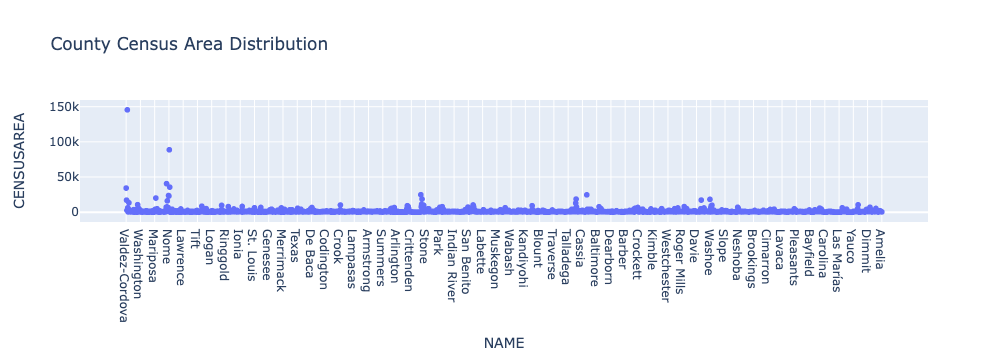

In [95]:
#County census area [scatterplot]
fig2 = px.scatter(df_Counties, x='NAME', y= 'CENSUSAREA', title = 'County Census Area Distribution')
fig2.show()

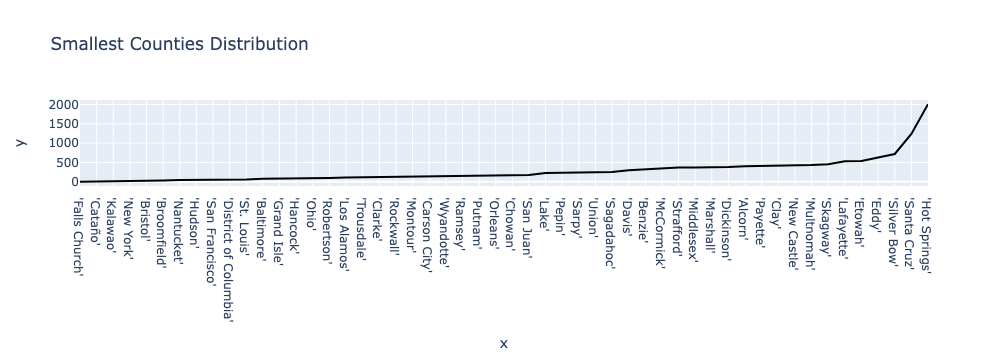

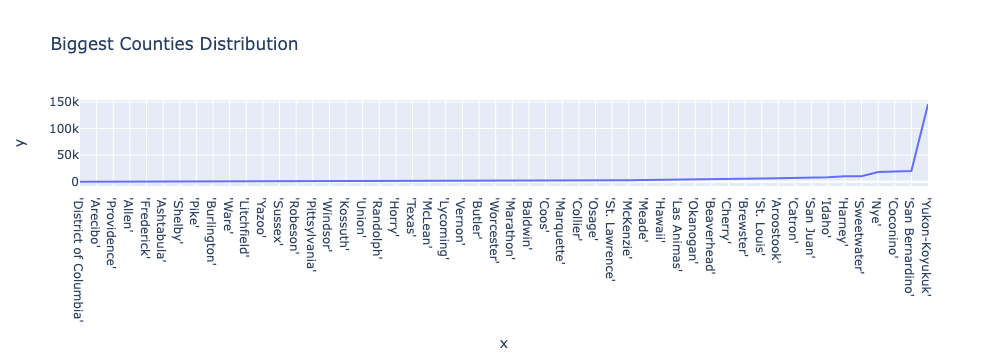

In [96]:
#number of smallest counties by state [pie chart]
# num = []
# for state_code in state_dict:

#     # list of all county count in each state 
#     state = state_dict[state_code]
#     num_counties = len(state),state_codes[state_code]
#     num.append(num_counties)

# print(num)
 
df_smallest = pd.read_csv('/Users/jadamacharie/Downloads/Smallest_county.csv')
df_smallest
fig3 = px.line(x= df_smallest['Name'], y = df_smallest['Census Area'], title= 'Smallest Counties Distribution')
fig3.update_traces(line_color='black')
fig3.show()


df_biggest = pd.read_csv('/Users/jadamacharie/Downloads/Biggest_county.csv')
#df_biggest = df_biggest.sort_values('Census Area')
df_biggest
fig4 = px.line(x= df_biggest['Name'], y = df_biggest['CensusArea'], title= 'Biggest Counties Distribution')
fig4.show()

#fig5 = px.scatter(x= df_biggest['Name'], y = df_biggest['Census Area'],title= 'Biggest Counties Distribution')
# fig5.update_traces(line_color='green')






## Task 3

In [97]:
#pio.write_image(test_fig, file = 'Test Fig.png', format = 'png')
pio.write_image(fig, file = 'Test Bar.png', format = 'png')
pio.write_image(fig2, file = 'Scatter CensusArea.png', format = 'png')
pio.write_image(fig3, file = 'Smallest_Counties.png', format = 'png')
pio.write_image(fig4, file = 'Biggest_Counties.png', format = 'png')
pio.write_html(fig2, file = 'Scatter CensusArea.html')

In [81]:
# pio.write_image(fig1, file = 'Outputs', format="png")